In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# This defines each sensor reading function
# It takes a pressure condition which alters the readings
# temp_stage_x is the temperature of stage x in a column
# flow_x is the reflux of a reflux drum or flow elsewhere
# hx_x_inlet/outlet is the heat exchanger temperature for inlet and outlet
# level is the level reading somewhere in the plant
# h_gas_det is hydrogen gas detector which is superflous to the data but its a reading they might have 
# and I expect several readings to have no correlation to impurities
# impurities are impurities in the product stream

def generate_time_series(length, pressure_condition, freq_temp=0.001, freq_flow=0.001):
    time_series = []

    temp_offset = 8 if pressure_condition == 1 else 0
    level_offset = -7 if pressure_condition == 1 else 0
    flow_offset = 10 if pressure_condition == 1 else 0
    hx_offset = 4 if pressure_condition == 1 else 0
    impurities_multiplier = 1.3 if pressure_condition == 1 else 1

    for t in range(length):
        temp_stage_1 = 140 + 5 * math.sin(2 * math.pi * freq_temp * t)
        temp_stage_2 = 150 + 5 * math.sin(2 * math.pi * 0.99 * freq_temp * t)
        temp_stage_3 = 162 + 6 * math.sin(2 * math.pi * 0.98 *freq_temp * t)
        temp_stage_4 = 165 + 4 * math.sin(2 * math.pi * 0.99 * freq_temp * t)
        temp_stage_5 = 170 + 4 * math.sin(2 * math.pi * 0.98 *freq_temp * t)
        temp_stage_6 = 174 + 5 * math.sin(2 * math.pi * 0.99 * freq_temp * t)
        temp_stage_7 = 178 + 3 * math.sin(2 * math.pi * freq_temp * t)
        temp_stage_8 = 181 + 4 * math.sin(2 * math.pi * 1.01 * freq_temp * t)
        temp_stage_9 = 190 + 4 * math.sin(2 * math.pi * freq_temp * t)
        temp_stage_10 = 201 + 4 * math.sin(2 * math.pi * 1.01 * freq_temp * t)
        temp_stage_11 = 209 + 4 * math.sin(2 * math.pi * freq_temp * t)
        flow_1 = 25 + 5 * math.cos(2 * math.pi * freq_flow * t)
        flow_2 = 26 + 4 * math.cos(2 * math.pi * freq_flow * t)
        flow_3 = 27 + 3 * math.cos(2 * math.pi * freq_flow * t)
        flow_4 = 27 + 5 * math.cos(2 * math.pi * freq_flow * t)
        flow_5 = 22 + 5 * math.cos(2 * math.pi * freq_flow * t)
        flow_6 = 22 + 5 * math.cos(2 * math.pi * freq_flow * t)
        hx_1_inlet = 35 + 4 * math.sin(2 * math.pi * 0.98 *freq_temp * t)
        hx_2_inlet = 40 + 3 * math.sin(2 * math.pi * 0.97 *freq_temp * t)
        hx_3_inlet = 45 + 4 * math.sin(2 * math.pi * 0.99 *freq_temp * t)
        hx_4_inlet = 50 + 2 * math.sin(2 * math.pi * 0.98 *freq_temp * t)
        hx_1_outlet = 30 + 4 * math.sin(2 * math.pi * 0.96 *freq_temp * t)
        hx_2_outlet = 35 + 1 * math.sin(2 * math.pi * 0.98 *freq_temp * t)
        hx_3_outlet = 40 + 3 * math.sin(2 * math.pi * 0.94 *freq_temp * t)
        hx_4_outlet = 45 + 4 * math.sin(2 * math.pi * 0.98 *freq_temp * t)
        level_1 = 80 + 11 * math.sin(2 * math.pi * 0.75 *freq_temp * t)
        level_2 = 75 + 7 * math.sin(2 * math.pi * 0.9 *freq_temp * t)
        level_3 = 76 + 12 * math.sin(2 * math.pi * 0.5 *freq_temp * t)
        level_4 = 53 + 15 * math.sin(2 * math.pi * 0.89 *freq_temp * t)
        level_5 = 46 + 6 * math.sin(2 * math.pi * 0.70 *freq_temp * t)
        level_6 = 89 + 9 * math.sin(2 * math.pi * 0.84 *freq_temp * t)
        level_7 = 90 + 23 * math.sin(2 * math.pi * 0.60 *freq_temp * t)
        level_8 = 80 + 14 * math.sin(2 * math.pi * 0.78 *freq_temp * t)
        level_9 = 23 + 3 * math.sin(2 * math.pi * 0.90 *freq_temp * t)
        level_10 = 45 + 7 * math.sin(2 * math.pi * 0.79 *freq_temp * t)
        level_11 = 60 + 11 * math.sin(2 * math.pi * 0.88 *freq_temp * t)
        level_12 = 89 + 25 * math.sin(2 * math.pi * 0.9 *freq_temp * t)
        h_gas_det_1 = 2 + math.cos(35 + 4 * math.sin(2 * math.pi * 0.98 *freq_temp * t))
        h_gas_det_2 = 2 + math.cos(36 + 4 * math.sin(2 * math.pi * 0.98 *freq_temp * t))
        h_gas_det_3 = 2 + math.cos(37 + 4 * math.sin(2 * math.pi * 0.98 *freq_temp * t))
        h_gas_det_4 = 2 + math.cos(38 + 4 * math.sin(2 * math.pi * 0.98 *freq_temp * t))
        h_gas_det_5 = 2 + math.cos(33 + 4 * math.sin(2 * math.pi * 0.98 *freq_temp * t))
        h_gas_det_6 = 2 + math.cos(39 + 4 * math.sin(2 * math.pi * 0.98 *freq_temp * t))
        impurities = 0.045 + 0.035 * math.sin(2 * math.pi * freq_temp * t) - 0.025 * math.cos(2 * math.pi * freq_flow * t)


        # Apply pressure condition modifications
        temp_values = [value + temp_offset for value in [temp_stage_1, temp_stage_2, temp_stage_3, temp_stage_4, temp_stage_5, temp_stage_6, temp_stage_7, temp_stage_8, temp_stage_9, temp_stage_10, temp_stage_11]]
        level_values = [value + level_offset for value in [level_1, level_2, level_3, level_4, level_5, level_6, level_7, level_8, level_9, level_10, level_11, level_12]]
        flow_values = [value + flow_offset for value in [flow_1, flow_2, flow_3, flow_4, flow_5, flow_6]]
        hx_values = [value + hx_offset for value in [hx_1_inlet,hx_2_inlet,hx_3_inlet,hx_4_inlet,hx_1_outlet,hx_2_outlet,hx_3_outlet,hx_4_outlet]]
        h_gas_det_values = [h_gas_det_1,h_gas_det_2,h_gas_det_3,h_gas_det_4, h_gas_det_5,h_gas_det_6]
        impurities = impurities * impurities_multiplier

        time_series.append((*temp_values, *level_values, *flow_values, *hx_values, *h_gas_det_values, impurities, pressure_condition))

    return time_series


In [3]:
column_names = ['Temp_stage_1', 'Temp_stage_2', 'Temp_stage_3', 'Temp_stage_4', 'Temp_stage_5',
              'Temp_stage_6', 'Temp_stage_7', 'Temp_stage_8','Temp_stage_9','Temp_stage_10', 
              'Temp_stage_11','Reflux_1','Reflux_2','Reflux_3','Column Inlet','Inlet Flow','Product Flow ',
              'hx_1_inlet','hx_2_inlet','hx_3_inlet','hx_4_inlet', 'hx_1_outlet','hx_2_outlet','hx_3_outlet',
              'hx_4_outlet','level_1','level_2','level_3','level_4','level_5','level_6','level_7',
              'level_8','level_9','level_10','level_11','level_12','h_gas_det_1','h_gas_det_2','h_gas_det_3',
              'h_gas_det_4','h_gas_det_5','h_gas_det_6',' Impurities', 'Pressure Condition']

In [4]:
# Length of time series
length = 5000

# Generate the time series data for the two conditions
data1 = generate_time_series(length, 0)
data2 = generate_time_series(length, 1)

# Convert the lists of tuples to dataframes
df1 = pd.DataFrame(data1, columns=column_names)
df2 = pd.DataFrame(data2, columns=column_names)

# Concatenate along the row axis (axis=0)
df = pd.concat([df1, df2], axis=0)

# Reset the index
df.reset_index(drop=True, inplace=True)
df

,Temp_stage_1,Temp_stage_2,Temp_stage_3,Temp_stage_4,Temp_stage_5,Temp_stage_6,Temp_stage_7,Temp_stage_8,Temp_stage_9,Temp_stage_10,...,level_11,level_12,h_gas_det_1,h_gas_det_2,h_gas_det_3,h_gas_det_4,h_gas_det_5,h_gas_det_6,Impurities,Pressure Condition
0,140.000000,150.000000,162.000000,165.000000,170.000000,174.000000,178.000000,181.000000,190.000000,201.000000,...,40.000000,45.000000,1.096308,1.872036,2.765414,2.955074,1.986723,2.266643,0.020000,0
1,140.031416,150.031102,162.036945,165.024881,170.024630,174.031102,178.018849,181.025384,190.025133,201.025384,...,40.017718,45.024630,1.107127,1.896500,2.781031,2.947485,1.962102,2.242826,0.020220,0
2,140.062830,150.062202,162.073888,165.049762,170.049259,174.062202,178.037698,181.050767,190.050264,201.050767,...,40.035436,45.049259,1.118487,1.921026,2.796173,2.939322,1.937505,2.218863,0.020442,0
3,140.094242,150.093300,162.110829,165.074640,170.073886,174.093300,178.056545,181.076148,190.075394,201.076148,...,40.053153,45.073886,1.130381,1.945597,2.810831,2.930590,1.912947,2.194769,0.020664,0
4,140.125650,150.124394,162.147766,165.099515,170.098510,174.124394,178.075390,181.101525,190.100520,201.101525,...,40.070868,45.098510,1.142801,1.970199,2.824996,2.921295,1.888445,2.170560,0.020887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,147.842946,156.307788,166.325537,171.646231,175.550358,180.307788,185.905768,190.114758,197.874357,210.114758,...,41.175447,46.550358,2.422648,1.465737,1.000026,1.453686,2.648207,2.409625,0.024587,1
9996,147.874350,156.337087,166.354813,171.669670,175.569876,180.337087,185.924610,190.139113,197.899480,210.139113,...,41.169526,46.569876,2.404880,1.449342,1.000076,1.470136,2.662945,2.427350,0.024867,1
9997,147.905758,156.366451,166.384228,171.693160,175.589485,180.366451,185.943455,190.163423,197.924606,210.163423,...,41.163703,46.589485,2.386873,1.433080,1.000511,1.486867,2.677497,2.444996,0.025148,1
9998,147.937170,156.395877,166.413779,171.716702,175.609186,180.395877,185.962302,190.187686,197.949736,210.187686,...,41.157980,46.609186,2.368632,1.416962,1.001334,1.503875,2.691856,2.462551,0.025431,1


<AxesSubplot:>

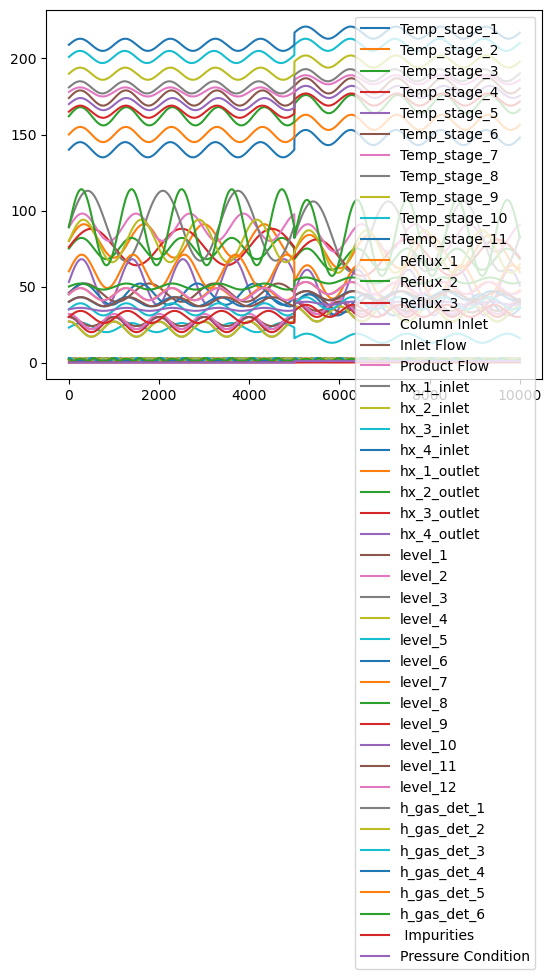

In [5]:
df.plot()

In [6]:
df.to_csv('mydata.csv', index=False)